# Funções de Ativação (ReLU, Sigmoid, Tanh)

Esta é uma breve introdução às três funções de ativação mais comuns usadas em Redes Neurais.

Uma **função de ativação** é um componente crucial de uma rede neural. Ela é aplicada à saída de um neurônio (ou de uma camada) e sua principal finalidade é introduzir **não-linearidade** no modelo. 

Sem funções de ativação (ou usando apenas ativações lineares), uma rede neural, não importa o quão profunda, se comportaria como um simples modelo linear. A não-linearidade é o que permite que a rede aprenda padrões complexos, como os encontrados em imagens, áudio e texto.

Vamos explorar a **ReLU**, a **Sigmoid** e a **Tanh**.

## 1. ReLU (Rectified Linear Unit)

A **ReLU** é, de longe, a função de ativação mais popular e a escolha padrão para a maioria das aplicações hoje em dia, especialmente em camadas ocultas.

Sua popularidade vem de sua simplicidade e eficácia. Ela ajuda a mitigar o "Problema do Gradiente Evanescente" (Vanishing Gradient Problem), permitindo que redes mais profundas sejam treinadas mais rapidamente.

### Usos Comuns:
- **Quase todas as camadas ocultas** de Redes Neurais Densas (MLPs).
- **Redes Neurais Convolucionais (CNNs):** É a função padrão para capturar features em imagens, pois sua natureza "tudo ou nada" (sinal positivo ou zero) é ótima para identificar padrões.

### Detalhes:
- **Fórmula:** $f(x) = \max(0, x)$
- **Domínio (Entrada):** $x \in \mathbb{R}$ (Qualquer número real)
- **Imagem (Saída):** $f(x) \in [0, \infty)$ (Valores de zero ao infinito)

### Gráfico:
<img src="https://docs.pytorch.org/docs/stable/_images/ReLU.png" width="400" alt="Gráfico da ReLU">

In [1]:
import torch
import torch.nn as nn

# --- Exemplo de Rede com ReLU (Dinâmica) ---

class RedeReLU(nn.Module):
    def __init__(self, input_size, output_size, n_neurons, n_layers):
        """
        Construtor da Rede Neural Dinâmica.
        
        Args:
            input_size (int): Neurônios na camada de entrada (features).
            output_size (int): Neurônios na camada de saída (previsão).
            n_neurons (int): Neurônios em cada camada oculta.
            n_layers (int): Número de camadas ocultas.
        """
        super(RedeReLU, self).__init__()
        
        layers = []
        
        # 1. Camada de Entrada -> Primeira Camada Oculta
        layers.append(nn.Linear(input_size, n_neurons))
        layers.append(nn.ReLU())
        
        # 2. Camadas Ocultas Dinâmicas
        # (Loop só executa se n_layers > 1)
        for _ in range(n_layers - 1):
            layers.append(nn.Linear(n_neurons, n_neurons))
            layers.append(nn.ReLU())
            
        # 3. Camada Oculta Final -> Camada de Saída
        layers.append(nn.Linear(n_neurons, output_size))
        
        # Compila todas as camadas em um modelo sequencial
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Testando o modelo
# Vamos criar uma rede com:
# - 10 features de entrada
# - 1 neurônio de saída
# - 3 camadas ocultas
# - 64 neurônios por camada oculta
modelo_relu = RedeReLU(input_size=10, output_size=1, n_neurons=64, n_layers=3)

dados_teste = torch.randn(5, 10) # 5 amostras, 10 features
saida = modelo_relu(dados_teste)

print("--- Modelo ReLU (Dinâmico) ---")
print(modelo_relu)
print(f"\nEntrada (shape): {dados_teste.shape}")
print(f"Saída (shape): {saida.shape}")

--- Modelo ReLU (Dinâmico) ---
RedeReLU(
  (network): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

Entrada (shape): torch.Size([5, 10])
Saída (shape): torch.Size([5, 1])


## 2. Sigmoid (Função Logística)

A **Sigmoid** foi uma das funções de ativação mais populares no passado. Sua principal característica é "esmagar" (squash) qualquer valor real para um intervalo entre 0 e 1.

Hoje, ela **não é recomendada para camadas ocultas**, pois sofre de saturação e do "Problema do Gradiente Evanescente" (gradientes ficam muito próximos de zero), o que torna o treinamento de redes profundas muito lento.

### Usos Comuns:
- **Camada de Saída para Classificação Binária:** É a escolha perfeita quando você precisa que a saída da sua rede seja uma **probabilidade** (ex: "há 75% de chance desta imagem ser um gato").

### Detalhes:
- **Fórmula:** $f(x) = \frac{1}{1 + e^{-x}}$
- **Domínio (Entrada):** $x \in \mathbb{R}$ (Qualquer número real)
- **Imagem (Saída):** $f(x) \in (0, 1)$ (Valores entre 0 e 1)

### Gráfico:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png" width="450" alt="Gráfico da Sigmoid">

In [2]:
import torch
import torch.nn as nn

# --- Exemplo de Rede com Sigmoid (na Saída) ---
# Este é o uso moderno e correto da Sigmoid.
# A rede aceita camadas ocultas dinâmicas (com ReLU),
# mas a saída é fixa em 1 neurônio com ativação Sigmoid.

class RedeSigmoid(nn.Module):
    def __init__(self, input_size, n_neurons, n_layers):
        """
        Construtor da Rede para Classificação Binária.
        
        Args:
            input_size (int): Neurônios na camada de entrada (features).
            n_neurons (int): Neurônios em cada camada oculta.
            n_layers (int): Número de camadas ocultas.
        """
        super(RedeSigmoid, self).__init__()
        
        layers = []
        
        # 1. Camada de Entrada -> Primeira Camada Oculta (com ReLU)
        layers.append(nn.Linear(input_size, n_neurons))
        layers.append(nn.ReLU())
        
        # 2. Camadas Ocultas Dinâmicas (com ReLU)
        for _ in range(n_layers - 1):
            layers.append(nn.Linear(n_neurons, n_neurons))
            layers.append(nn.ReLU())
            
        # 3. Camada Oculta Final -> Camada de Saída (com 1 neurônio)
        layers.append(nn.Linear(n_neurons, 1))
        
        # 4. Ativação final Sigmoid (para probabilidade)
        layers.append(nn.Sigmoid())
        
        # Compila todas as camadas
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Testando o modelo
# Vamos criar uma rede com:
# - 10 features de entrada
# - 2 camadas ocultas
# - 32 neurônios por camada oculta
# (A saída é sempre 1 com Sigmoid)
modelo_sigmoid = RedeSigmoid(input_size=10, n_neurons=32, n_layers=2)

dados_teste = torch.randn(5, 10) # 5 amostras, 10 features
saida = modelo_sigmoid(dados_teste)

print("--- Modelo Sigmoid (Saída para Classificação) ---")
print(modelo_sigmoid)
print(f"\nEntrada (shape): {dados_teste.shape}")
print(f"Saída (shape): {saida.shape}")
print(f"Exemplo de saída (probabilidades):\\n {saida}")

--- Modelo Sigmoid (Saída para Classificação) ---
RedeSigmoid(
  (network): Sequential(
    (0): Linear(in_features=10, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

Entrada (shape): torch.Size([5, 10])
Saída (shape): torch.Size([5, 1])
Exemplo de saída (probabilidades):\n tensor([[0.4849],
        [0.4967],
        [0.5031],
        [0.4738],
        [0.5220]], grad_fn=<SigmoidBackward0>)


## 3. Tanh (Tangente Hiperbólica)

A **Tanh** (pronuncia-se "tân-agá") é muito similar à Sigmoid, mas "esmaga" os valores para o intervalo entre **-1 e 1**.

A principal vantagem sobre a Sigmoid é que sua saída é **centrada em zero** (a média dos valores é próxima de 0). Isso pode ajudar o modelo a convergir mais rapidamente.

Assim como a Sigmoid, ela também sofre do problema de gradiente evanescente e **não é recomendada para camadas ocultas** na maioria dos casos (ReLU é melhor).

### Usos Comuns:
- **Redes Neurais Recorrentes (RNNs):** Foi historicamente muito usada em RNNs (como LSTMs e GRUs) para controlar os "portões" (gates) de memória.
- **Normalização de Saída:** Usada em camadas de saída se o valor esperado estiver no intervalo [-1, 1].

### Detalhes:
- **Fórmula:** $f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$
- **Domínio (Entrada):** $x \in \mathbb{R}$ (Qualquer número real)
- **Imagem (Saída):** $f(x) \in (-1, 1)$ (Valores entre -1 e 1)

### Gráfico:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Hyperbolic_Tangent.svg/330px-Hyperbolic_Tangent.svg.png" width="450" alt="Gráfico da Tanh">

In [3]:
import torch
import torch.nn as nn

# --- Exemplo de Rede com Tanh (Dinâmica) ---

class RedeTanh(nn.Module):
    def __init__(self, input_size, output_size, n_neurons, n_layers):
        """
        Construtor da Rede Neural Dinâmica.
        
        Args:
            input_size (int): Neurônios na camada de entrada (features).
            output_size (int): Neurônios na camada de saída (previsão).
            n_neurons (int): Neurônios em cada camada oculta.
            n_layers (int): Número de camadas ocultas.
        """
        super(RedeTanh, self).__init__()
        
        layers = []
        
        # 1. Camada de Entrada -> Primeira Camada Oculta
        layers.append(nn.Linear(input_size, n_neurons))
        layers.append(nn.Tanh())
        
        # 2. Camadas Ocultas Dinâmicas
        for _ in range(n_layers - 1):
            layers.append(nn.Linear(n_neurons, n_neurons))
            layers.append(nn.Tanh())
            
        # 3. Camada Oculta Final -> Camada de Saída
        layers.append(nn.Linear(n_neurons, output_size))
        
        # Compila todas as camadas
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Testando o modelo
# Vamos criar uma rede com:
# - 10 features de entrada
# - 1 neurônio de saída
# - 3 camadas ocultas
# - 64 neurônios por camada oculta
modelo_tanh = RedeTanh(input_size=10, output_size=1, n_neurons=64, n_layers=3)

dados_teste = torch.randn(5, 10) # 5 amostras, 10 features
saida = modelo_tanh(dados_teste)

print("--- Modelo Tanh (Dinâmico) ---")
print(modelo_tanh)
print(f"\nEntrada (shape): {dados_teste.shape}")
print(f"Saída (shape): {saida.shape}")

--- Modelo Tanh (Dinâmico) ---
RedeTanh(
  (network): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): Tanh()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): Tanh()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

Entrada (shape): torch.Size([5, 10])
Saída (shape): torch.Size([5, 1])


## O "Porquê": O Problema do Gradiente Evanescente

Até agora, vimos o "o quê". Agora, vamos ver o "porquê".

Por que a **ReLU** se tornou a rainha das camadas ocultas, destronando a **Sigmoid** e a **Tanh**? A resposta está no **treinamento** de redes profundas (deep learning).

As redes neurais aprendem através de um processo chamado *backpropagation* (retropropagação), que usa a "Regra da Cadeia" do cálculo para enviar um sinal de erro (o **gradiente**) de volta, camada por camada, para atualizar os pesos.

O problema é que a Regra da Cadeia envolve **multiplicações** sucessivas.

### O Problema da Saturação

Vamos olhar para a Sigmoid e a Tanh. Para entradas longe de 0 (ex: 4 ou -4), o gráfico delas fica "plano" (saturado). Uma linha plana tem derivada (gradiente) **igual a 0**.

Mesmo no centro (em x=0), a derivada da Sigmoid é no máximo **0.25**, e a da Tanh é no máximo **1.0** (e cai rapidamente).

Agora, imagine uma rede com 10 camadas ocultas:
* **Gradiente com Sigmoid/Tanh:** Você estará multiplicando números muito pequenos (ex: $0.2 \times 0.1 \times 0.3 \times 0.15 ...$).
* **Resultado:** O resultado será um número *ridiculamente* pequeno (como $0.000009$).

Este é o **Problema do Gradiente Evanescente** (Vanishing Gradient Problem). O sinal de erro "desaparece" antes de chegar às primeiras camadas da rede, e elas simplesmente **param de aprender**.

### A Solução da ReLU

Agora, olhe para a **ReLU**:
* Para qualquer entrada negativa, a derivada é **0**.
* Para qualquer entrada positiva, a derivada é uma **constante 1**.

Em uma rede profunda usando ReLU, o gradiente que passa é: $1 \times 1 \times 1 \times 1 ... = \mathbf{1}$.

O sinal de erro flui perfeitamente através das camadas ativas, permitindo que redes muito profundas aprendam eficientemente.

Abaixo, vamos provar isso plotando não só as funções, mas suas derivadas (gradientes), que o PyTorch pode calcular para nós.

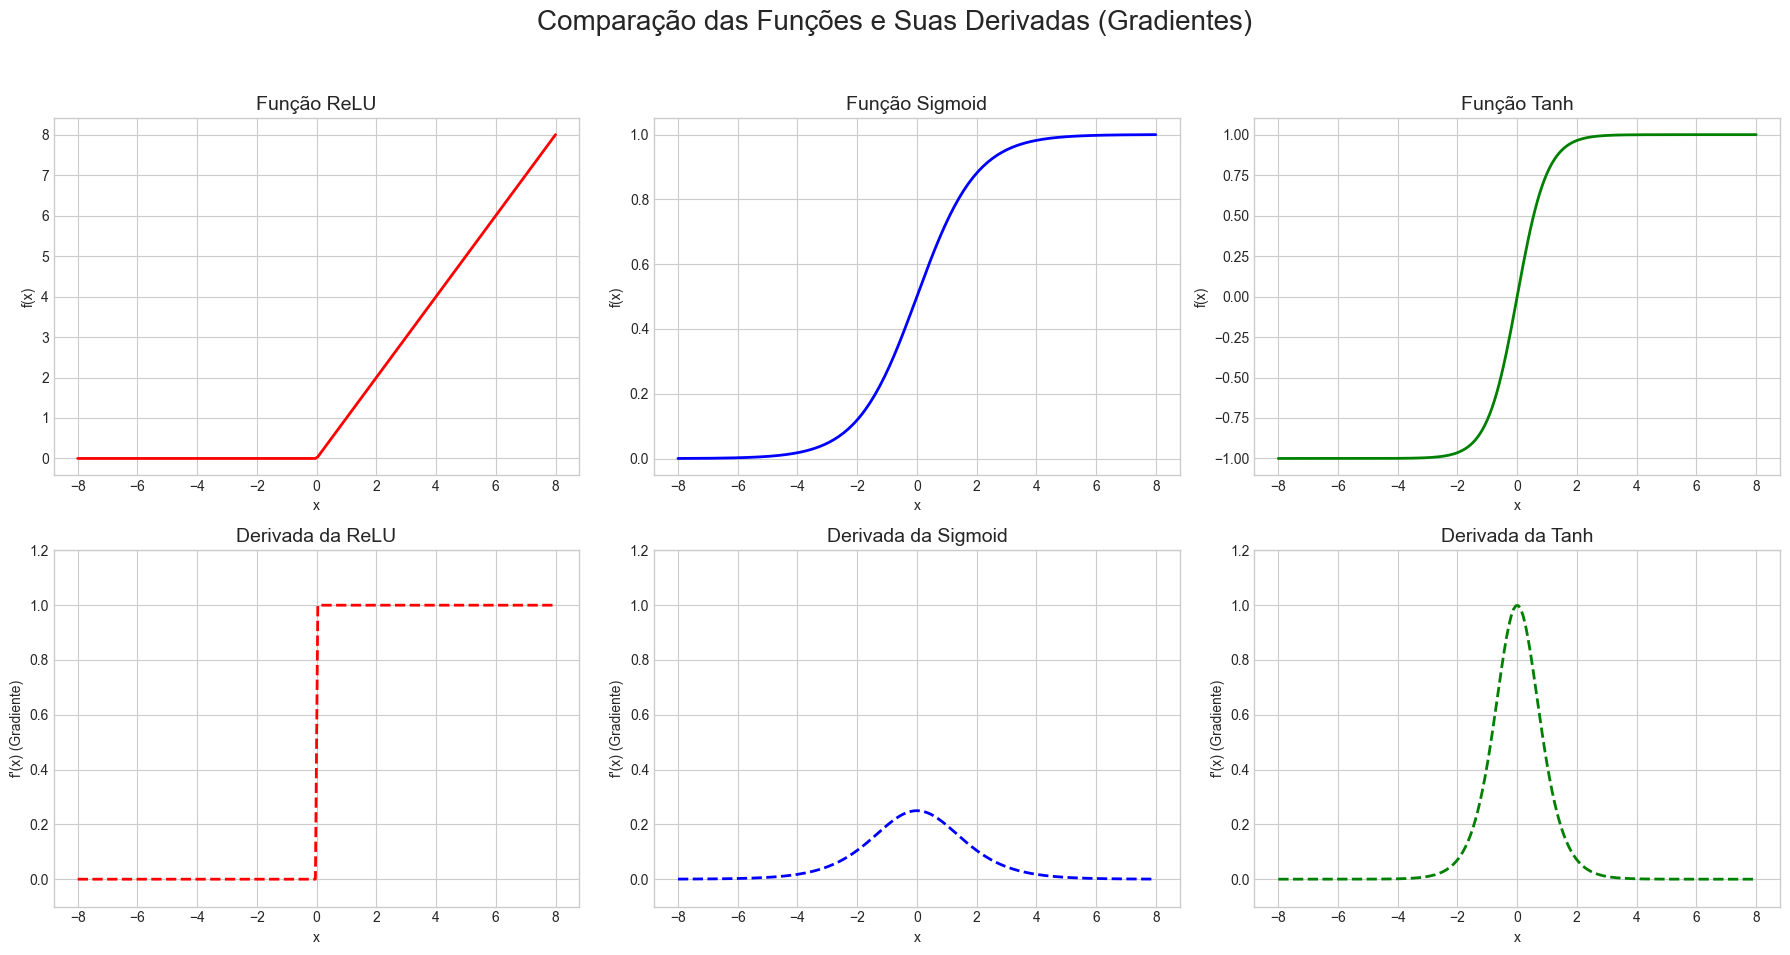

In [5]:
# --- No seu bloco de plotagem, adicione isso ---

# 1. Criar um tensor de entrada (o eixo x)
x = torch.linspace(-8, 8, 200)
x.requires_grad_() # ESSENCIAL: Pedimos ao PyTorch para rastrear os gradientes

# 2. Aplicar as funções
y_relu = nn.ReLU()(x)
y_sigmoid = nn.Sigmoid()(x)
y_tanh = nn.Tanh()(x)

# 3. Calcular os gradientes (as derivadas)
# (Calculamos a derivada da soma para obter as derivadas em cada ponto)
y_relu.sum().backward()
d_relu = x.grad.clone() # Salvamos o gradiente
x.grad.zero_() # Zeramos para o próximo cálculo

y_sigmoid.sum().backward()
d_sigmoid = x.grad.clone()
x.grad.zero_()

y_tanh.sum().backward()
d_tanh = x.grad.clone()
x.grad.zero_()


# 4. Plotar!
plt.figure(figsize=(18, 10))
plt.style.use('seaborn-v0_8-whitegrid')

# --- Gráficos das Funções (como você já tem) ---
plt.subplot(2, 3, 1)
plt.title('Função ReLU', fontsize=14)
plt.plot(x.detach().numpy(), y_relu.detach().numpy(), 'r', linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(2, 3, 2)
plt.title('Função Sigmoid', fontsize=14)
plt.plot(x.detach().numpy(), y_sigmoid.detach().numpy(), 'b', linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(2, 3, 3)
plt.title('Função Tanh', fontsize=14)
plt.plot(x.detach().numpy(), y_tanh.detach().numpy(), 'g', linewidth=2)
plt.xlabel('x')
plt.ylabel('f(x)')

# --- NOVOS Gráficos das Derivadas ---
plt.subplot(2, 3, 4)
plt.title('Derivada da ReLU', fontsize=14)
plt.plot(x.detach().numpy(), d_relu.numpy(), 'r--', linewidth=2)
plt.xlabel('x')
plt.ylabel("f'(x) (Gradiente)")
plt.ylim(-0.1, 1.2) # Ajuste de eixo

plt.subplot(2, 3, 5)
plt.title('Derivada da Sigmoid', fontsize=14)
plt.plot(x.detach().numpy(), d_sigmoid.numpy(), 'b--', linewidth=2)
plt.xlabel('x')
plt.ylabel("f'(x) (Gradiente)")
plt.ylim(-0.1, 1.2) # Ajuste de eixo

plt.subplot(2, 3, 6)
plt.title('Derivada da Tanh', fontsize=14)
plt.plot(x.detach().numpy(), d_tanh.numpy(), 'g--', linewidth=2)
plt.xlabel('x')
plt.ylabel("f'(x) (Gradiente)")
plt.ylim(-0.1, 1.2) # Ajuste de eixo


plt.suptitle('Comparação das Funções e Suas Derivadas (Gradientes)', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Um Parêntese: Funções de Ativação para a Camada de Saída

Até agora, focamos nas **camadas ocultas**. A escolha da ativação para a **última camada** (a camada de saída) é uma história diferente e depende 100% do **tipo de problema** que você está resolvendo.

A função de ativação de saída formata a resposta final da rede para que ela corresponda ao que você precisa prever.

### 1. Regressão (Prevendo um Valor)
* **Exemplos:** Prever o preço de uma casa, a temperatura de amanhã, o custo de uma usina.
* **Requisito da Saída:** Um número contínuo, sem limite (ex: R$ 500.000 ou -10°C).
* **Ativação de Saída:** **Nenhuma (Linear)**.
* **Por quê?** Você *não* quer limitar ou "esmagar" sua previsão. A saída bruta do último `nn.Linear` é a sua resposta. (É por isso que nossos códigos `RedeReLU` e `RedeTanh` não tinham ativação final!)

### 2. Classificação Binária (Duas Classes)
* **Exemplos:** "É um gato ou um cachorro?", "É spam ou não é spam?".
* **Requisito da Saída:** Uma única probabilidade (um número entre 0 e 1).
* **Ativação de Saída:** **Sigmoid**.
* **Por quê?** Como vimos, a Sigmoid "espreme" qualquer número para o intervalo (0, 1), que é a definição de uma probabilidade. Uma saída de `0.85` significa "85% de chance de ser a classe 1".

### 3. Classificação Multiclasse (3 ou mais Classes)
* **Exemplos:** "Gato, Cachorro ou Pássaro?", "Dígitos de 0 a 9".
* **Requisito da Saída:** Uma distribuição de probabilidade entre $N$ classes (ex: [Gato: 10%, Cachorro: 85%, Pássaro: 5%]). A soma de todas as probabilidades deve ser 1.
* **Ativação de Saída:** **Softmax**.
* **Por quê?** A Softmax pega $N$ saídas brutas (chamadas *logits*) e as normaliza para que somem 1. Se a rede der `[1.2, 4.5, 0.1]`, a Softmax transforma isso em algo como `[0.08, 0.90, 0.02]`.

| Tipo de Problema | Camada de Saída | Ativação Final |
| :--- | :--- | :--- |
| **Regressão** | 1 ou mais neurônios | **Nenhuma (Linear)** |
| **Classificação Binária** | 1 neurônio | **Sigmoid** |
| **Classificação Multiclasse**| $N$ neurônios (1 por classe) | **Softmax** |

> **Nota do PyTorch:** Ao usar `nn.CrossEntropyLoss` (a função de perda padrão para classificação), você **não** deve adicionar `nn.Softmax()` à sua rede. A própria função de perda já aplica a Softmax internamente de forma mais eficiente.

### Gráfico da Softmax:
<img src="https://cdn.botpenguin.com/assets/website/Softmax_Function_07fe934386.png" width="500" alt="Gráfico da Função Softmax">

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# --- Exemplo de Rede com Softmax (na Saída para Multiclasse) ---

class RedeSoftmax(nn.Module):
    def __init__(self, input_size, num_classes, n_neurons, n_layers):
        """
        Construtor da Rede para Classificação Multiclasse.
        
        Args:
            input_size (int): Neurônios na camada de entrada (features).
            num_classes (int): Número total de classes (ex: 10 para dígitos 0-9).
            n_neurons (int): Neurônios em cada camada oculta.
            n_layers (int): Número de camadas ocultas.
        """
        super(RedeSoftmax, self).__init__()
        
        layers = []
        
        # 1. Camada de Entrada -> Primeira Camada Oculta (com ReLU)
        layers.append(nn.Linear(input_size, n_neurons))
        layers.append(nn.ReLU()) # ReLU para camadas ocultas é a melhor prática
        
        # 2. Camadas Ocultas Dinâmicas (com ReLU)
        for _ in range(n_layers - 1):
            layers.append(nn.Linear(n_neurons, n_neurons))
            layers.append(nn.ReLU())
            
        # 3. Camada Oculta Final -> Camada de Saída
        #    A saída aqui são os "logits" (valores brutos antes da probabilidade)
        layers.append(nn.Linear(n_neurons, num_classes))
        
        # 4. **Importante:** A Softmax geralmente é aplicada PELA FUNÇÃO DE PERDA
        #    (como nn.CrossEntropyLoss) para estabilidade numérica.
        #    Se você *precisar* da saída como probabilidades no forward (para inferência, por exemplo),
        #    você usaria F.softmax ou nn.Softmax.
        #    Para fins didáticos, vamos incluir F.softmax aqui para *demonstrar* o resultado,
        #    mas lembre-se que para *treinamento*, é melhor deixar a loss fazer isso.
        self.network_with_softmax = nn.Sequential(*layers)

    def forward(self, x):
        # Primeiro, obtemos os logits (saídas brutas)
        logits = self.network_with_softmax(x)
        
        # Aplicamos Softmax *apenas para demonstração das probabilidades*
        # Durante o treinamento real com nn.CrossEntropyLoss, você passaria 'logits' diretamente.
        probabilities = F.softmax(logits, dim=1) 
        
        return probabilities, logits # Retornamos ambos para clareza didática

# Testando o modelo
# Vamos criar uma rede para classificar 10 classes (ex: dígitos de 0 a 9)
# - 10 features de entrada
# - 10 classes de saída
# - 2 camadas ocultas
# - 64 neurônios por camada oculta
modelo_softmax = RedeSoftmax(input_size=10, num_classes=10, n_neurons=64, n_layers=2)

dados_teste = torch.randn(5, 10) # 5 amostras, 10 features
probabilities, logits = modelo_softmax(dados_teste)

print("--- Modelo Softmax (Saída para Multiclasse) ---")
print(modelo_softmax)
print(f"\nEntrada (shape): {dados_teste.shape}")
print(f"Logits (saída bruta, shape): {logits.shape}")
print(f"Exemplo de Logits:\\n {logits.round(decimals=2)}")
print(f"\nProbabilidades (após Softmax, shape): {probabilities.shape}")
print(f"Exemplo de Probabilidades (cada linha soma 1):\\n {probabilities.round(decimals=2)}")
print(f"\nVerificação: Soma da 1ª amostra de probabilidades: {probabilities[0].sum():.2f}")

--- Modelo Softmax (Saída para Multiclasse) ---
RedeSoftmax(
  (network_with_softmax): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

Entrada (shape): torch.Size([5, 10])
Logits (saída bruta, shape): torch.Size([5, 10])
Exemplo de Logits:\n tensor([[ 0.0600,  0.2000,  0.0900, -0.0600, -0.2400, -0.0600,  0.0100,  0.0500,
         -0.0100, -0.0000],
        [-0.0200,  0.1500, -0.0000,  0.0500, -0.1500,  0.1000, -0.0700, -0.0700,
          0.0000,  0.1600],
        [-0.1100, -0.0300,  0.1500, -0.1100, -0.2300, -0.0900,  0.1300, -0.0000,
          0.1200, -0.0100],
        [-0.0300,  0.1000,  0.1300, -0.0800, -0.1200, -0.1000,  0.0900,  0.0300,
          0.0700,  0.0500],
        [-0.1000,  0.1200,  0.0800, -0.0200, -0.0300,  0.0500,  0.0100, -0.0600,
          0.0100,  0.0500]], grad_fn=<RoundBackward1>)

Pr

## 4. Leaky ReLU (e o Problema do "Neurônio Morto")

A ReLU é fantástica, mas ela tem seu próprio pequeno problema: o **"Neurônio Morto" (Dying ReLU)**.

Imagine que, durante o treinamento, uma atualização de peso faz com que um neurônio específico só receba entradas negativas.
1.  A entrada para a ReLU será sempre negativa.
2.  A saída da ReLU será, portanto, sempre **0**.
3.  A derivada (gradiente) nesse ponto também será **0**.

Esse neurônio "morreu". Ele para de contribuir para a rede e nunca mais aprenderá ou se recuperará, pois o gradiente que passa por ele será sempre zero.

### A Solução: Leaky ReLU

A **Leaky ReLU** (ReLU "Vazada") é uma correção elegante para isso.

Em vez de ser 0 para valores negativos, ela permite um pequeno "vazamento" — uma inclinação negativa muito pequena (controlada por um parâmetro $\alpha$, geralmente 0.01).

* **Fórmula:** $f(x) = \begin{cases} x & \text{se } x \ge 0 \\ \alpha x & \text{se } x < 0 \end{cases}$ (ou $f(x) = \max(\alpha x, x)$)
* **PyTorch:** `nn.LeakyReLU(negative_slope=0.01)`

Isso garante que o gradiente nunca seja *exatamente* zero (será $1$ para positivos e $\alpha$ para negativos). O neurônio sempre terá um caminho para se atualizar e "reviver" se necessário.

Na prática, é uma substituição direta da `nn.ReLU()` que pode tornar o treinamento um pouco mais robusto.

### Gráfico da Leaky ReLU:
<img src="https://miro.medium.com/1*y1Gri2Hlk6X465Sfs_34zg.png" width="400" alt="Gráfico da Leaky ReLU">

In [6]:
# --- Exemplo de Rede com LeakyReLU (Dinâmica) ---

class RedeLeakyReLU(nn.Module):
    def __init__(self, input_size, output_size, n_neurons, n_layers):
        super(RedeLeakyReLU, self).__init__()
        
        layers = []
        layers.append(nn.Linear(input_size, n_neurons))
        layers.append(nn.LeakyReLU(negative_slope=0.01)) # <-- A mudança
        
        for _ in range(n_layers - 1):
            layers.append(nn.Linear(n_neurons, n_neurons))
            layers.append(nn.LeakyReLU(negative_slope=0.01)) # <-- A mudança
            
        layers.append(nn.Linear(n_neurons, output_size))
        
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Testando
modelo_leaky = RedeLeakyReLU(input_size=10, output_size=1, n_neurons=64, n_layers=3)
print("--- Modelo Leaky ReLU (Dinâmico) ---")
print(modelo_leaky)

--- Modelo Leaky ReLU (Dinâmico) ---
RedeLeakyReLU(
  (network): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)
